## Experiment 3: Binary Classification with Decision Tree

In this experiment, we will train a multi-class classifier using Decision Tree.

Dataset can be downloaded https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

The steps are:
1.   Load and explore dataset
2.   Train Decision Tree with Default Hyperparameters
3.   Reduce Overfitting with min_sample_split
4.   Reduce Further Overfitting with max_depth
5.   Assess model on Testing Set

## 1. Load and Explore Dataset

**[1.1]** Import the pandas package

In [ ]:
import pandas as pd
import numpy as np

**[1.2]** Mounting the drive

You must allow access to your drive by signing in to your Google account
In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive"

 AT2_default_template.gdoc
 atlassian_reviews.csv
 CNN_Articles_2021-2023.csv
 CNN_Articles_2021-2023.gsheet
'Colab Notebooks'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (1).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (2).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (3).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c.gsheet'
'Copy of MLAA - Lecture 1.gslides'
'Copy of MLAA - Lecture 2.gslides'
'Copy of MLAA - Lecture 5.gslides'
 data
'DSP_AT3 _REPORT.gdoc'
'DSP - Lab 4 - Exercise 1 - Solutions.gdoc'
 DVN_data
'Experiment reports'
'Experiment reports 2'
 glassdoor_data
 Lambda_Project_Report_Draft.gdoc
 NLP_data
'ODI Data Ethics Canvas.gdoc'
'Reddit_Data (1).csv'
 Untitled
'Untitled document (1).gdoc'
'Untitled document.gdoc'


**[1.3]** Load the prepared dataset

In [ ]:

X_train = pd.read_csv('/content/drive/My Drive/data/X_train.csv', index_col=0)
X_val = pd.read_csv('/content/drive/My Drive/data/X_val.csv', index_col=0)
X_test = pd.read_csv('/content/drive/My Drive/data/X_test.csv', index_col=0)
y_train = pd.read_csv('/content/drive/My Drive/data/y_train.csv', index_col=0)
y_val = pd.read_csv('/content/drive/My Drive/data/y_val.csv', index_col=0)
y_test = pd.read_csv('/content/drive/My Drive/data/y_test.csv', index_col=0)

**[1.4]** Display the first 5 rows of X_train

In [ ]:
# Solution
X_train.head()

,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
117183,2.0,2.0,1,1,1,3,2,2,2,1,2,3,2,0,1,0
80308,3.0,0.0,4,10,7,8,5,6,9,4,7,7,10,1,0,0
18279,4.0,2.0,5,9,10,10,10,10,10,4,10,3,10,0,1,0
9337,2.0,2.0,9,8,10,7,10,10,10,3,9,5,10,0,1,0
74816,5.0,0.0,8,2,6,3,10,10,3,10,3,1,3,1,0,0


## 2. Train Decision Tree with Default Hyperparameters

**[2.1]** Import DecisionTreeClassifier from sklearn.tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**[2.2]** Instantiate a DecisionTreeClassifier() model with random_state= 42parameter in order to keep our results consistent

In [ ]:
tree_1 = DecisionTreeClassifier(random_state=42)

**[2.3]** Train the model on the training set



In [ ]:
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**[2.4]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[2.5]** Import the accuracy and f1 scores from sklearn

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

**[2.6]** Print the accuracy score of the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9999905957586872
0.9887440758293838


**[2.7]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9999905949609381
0.9887355406471229


**[2.8]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[2.9]** Print the confusion matrices for the training and validation sets for this model

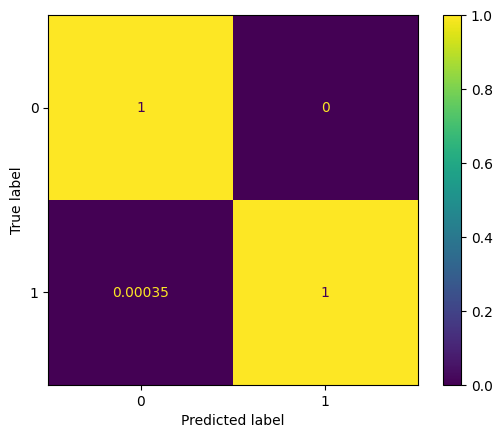

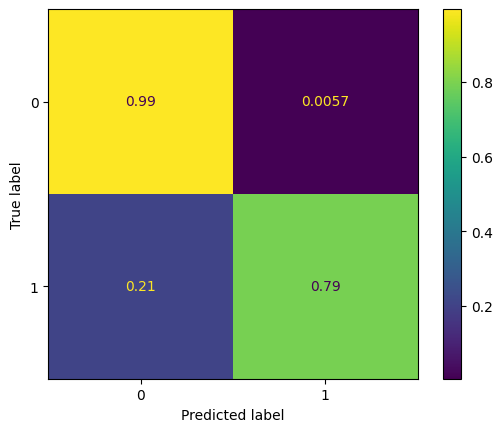

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_1, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_1, X_val, y_val, normalize='true')

## 3. Reduce Overfitting with min_samples_split

**[3.1]** Train a DecisionTree model with min_samples_split=5 and save the predictions from the training and validation sets

In [ ]:
tree_split_1 = DecisionTreeClassifier(random_state=42, min_samples_split=5).fit(X_train, y_train)
y_train_preds = tree_split_1.predict(X_train)
y_val_preds = tree_split_1.predict(X_val)

**[3.2]** Print the accuracy score of the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9978934499459257
0.9901828029790115


**[3.3]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9978707914562606
0.9900292367210125


Print the confusion matrices for the training and validation sets for tree_split_1 model

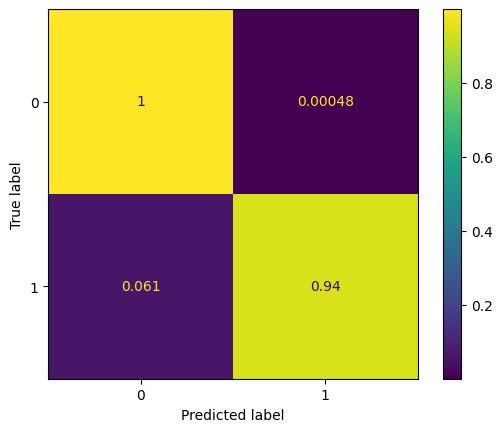

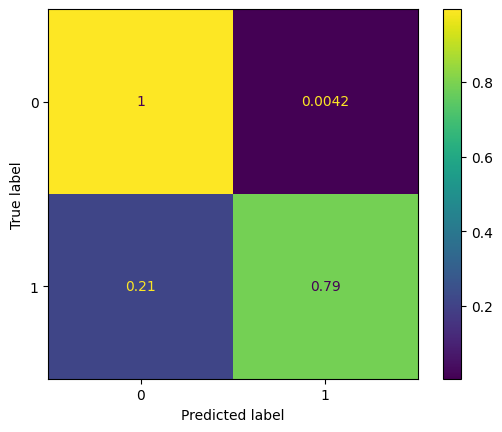

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_split_1, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_split_1, X_val, y_val, normalize='true')

**[3.4]** Train a DecisionTree model with min_samples_split=10 and save the predictions from the training and validation sets

In [ ]:
tree_split_2 = DecisionTreeClassifier(random_state=42, min_samples_split=10).fit(X_train, y_train)
y_train_preds = tree_split_2.predict(X_train)
y_val_preds = tree_split_2.predict(X_val)

**[3.5]** Print the accuracy score of the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9963323458879955
0.9901828029790115


**[3.6]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9962824222141842
0.9899485823621924


 **[3.7]** Print the confusion matrices for the training and validation sets for tree_split_2 model

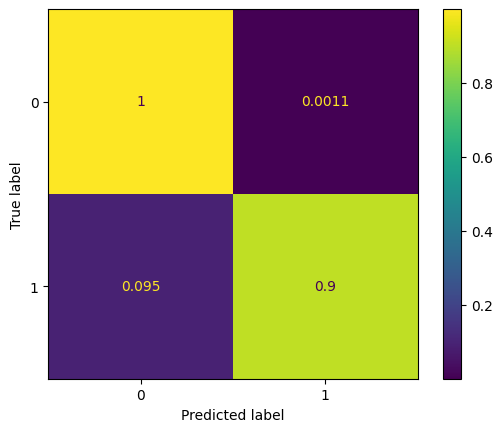

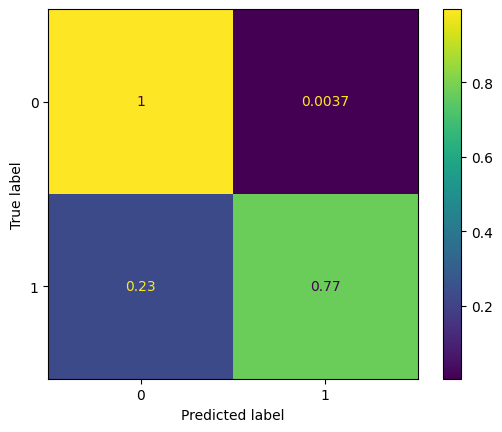

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_val, y_val, normalize='true')

**[3.7]** Train a DecisionTree model with min_samples_split=20 and save the predictions from the training and validation sets

In [ ]:
tree_split_3 = DecisionTreeClassifier(random_state=42, min_samples_split=20).fit(X_train, y_train)
y_train_preds = tree_split_3.predict(X_train)
y_val_preds = tree_split_3.predict(X_val)

**[3.8]** Print the accuracy score of the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9949311139323835
0.991198375084631


**[3.9]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9948451657553697
0.9910030398899077


**[3.11]** Print the confusion matrices for the training and validation sets for tree_split_3 model

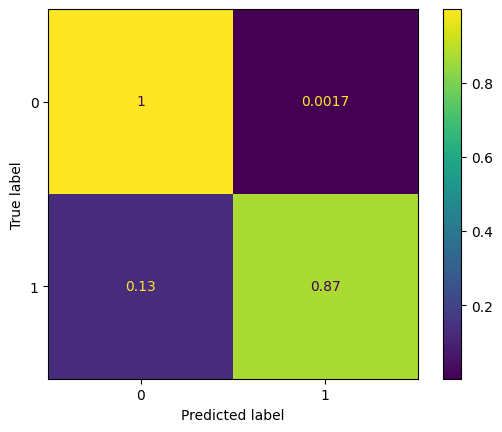

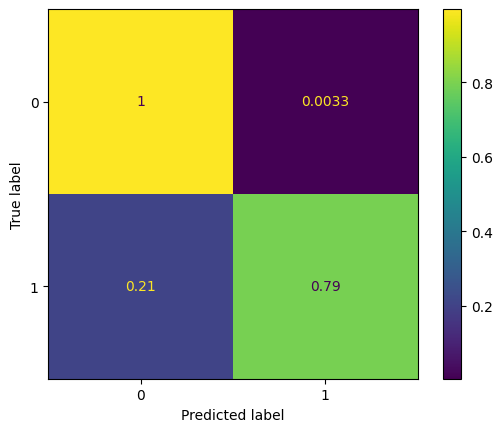

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_split_3, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_split_3, X_val, y_val, normalize='true')

## 4. Reduce Further Overfitting with max_depth

**[4.1]** Let's have a look at what is the current value for this hyperparameter

In [ ]:
tree_1.tree_.max_depth

23

**[4.2]** Train a DecisionTree model with min_samples_split= 2, max_depth = 20 and save the predictions from the training and validation sets

In [ ]:
tree_depth_1 = DecisionTreeClassifier(random_state=42, min_samples_split = 2, max_depth=20).fit(X_train, y_train)
y_train_preds = tree_depth_1.predict(X_train)
y_val_preds = tree_depth_1.predict(X_val)

**[4.3]** Print the accuracy score of the training and validation sets bold text

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9998683406216203
0.9890825998645904


**[4.4]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9998682063345131
0.9890576843858615


**[4.5]** Train a DecisionTree model with min_samples_split=2, max_depth=15 and save the predictions from the training and validation sets

In [ ]:
tree_depth_2 = DecisionTreeClassifier(random_state=42, min_samples_split= 2, max_depth=15).fit(X_train, y_train)
y_train_preds = tree_depth_2.predict(X_train)
y_val_preds = tree_depth_2.predict(X_val)

**[4.6]** Print the accuracy score of the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9981379602200593
0.9906059580230197


**[4.7]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9981132824551234
0.9904361265704189



**[4.8]** Train a DecisionTree model with min_samples_split=2, max_depth=10 and save the predictions from the training and validation sets

In [ ]:
tree_depth_3 = DecisionTreeClassifier(random_state=42, min_samples_split= 2, max_depth= 10).fit(X_train, y_train)
y_train_preds = tree_depth_3.predict(X_train)
y_val_preds = tree_depth_3.predict(X_val)

**[4.9]** Print the accuracy score of the training and validation sets

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.992382564536606
0.9906905890318213


**[4.10]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.991994763566129
0.9901705619003688


This is the best model with not much overfitting

**[4.11]** Print the confusion matrices for the training and validation sets for tree_depth_3 model

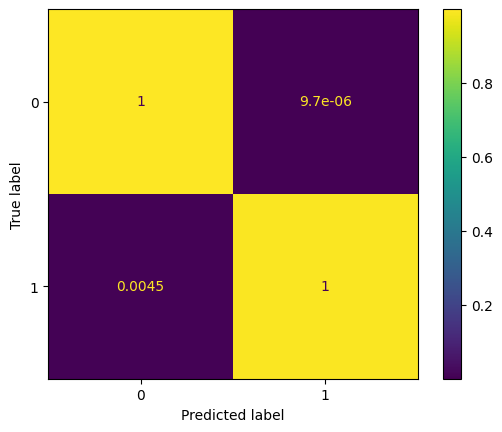

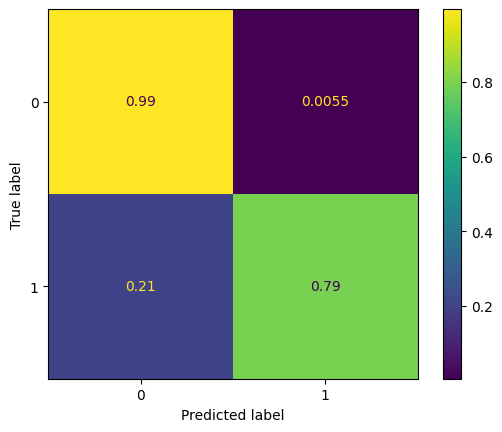

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_depth_1, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_depth_1, X_val, y_val, normalize='true')

## 5. Assess model on Testing Set

**[5.1]** Print the accuracy and f1 scores of our best model on the testing set

In [ ]:
y_test_preds = tree_1.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9884216940889702
0.9886176213822455


**[5.2]** Print the confusion matrix for this model on the testing set

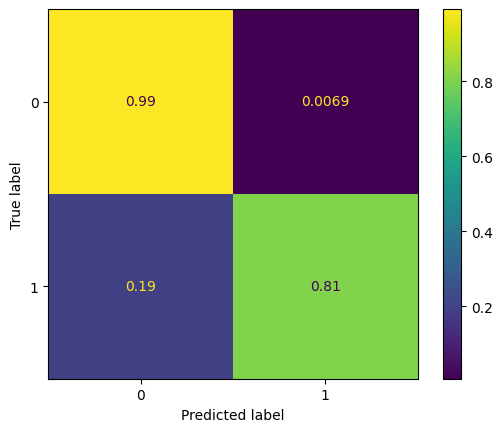

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_1, X_test, y_test, normalize='true')